In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
products_br = pd.read_csv("../Data_analysis/datasets/products.csv")
translate = pd.read_csv("../Data_analysis/datasets/product_category_name_translation.csv")

products = pd.merge(products_br, translate, on="product_category_name", how="left")

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [55]:
categories_count = pd.DataFrame(products.groupby(["product_category_name_english"])['product_id'].count())
categories_count.sort_values('product_id', ascending=False, inplace=True)
categories_count

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [58]:
reviews_data = pd.read_csv('../Data_analysis/datasets/order_reviews.csv')
print(len(reviews_data))
reviews_data.head()


99224


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [61]:
orders_data = pd.read_csv('../Data_analysis/datasets/order_items.csv')
orders_data.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
16400,25877da244143a5dd6a686b8090c98e1,1,e59dd207c69d86e890febadc796d1078,e9bc59e7b60fc3063eb2290deda4cced,2018-04-27 16:31:33,148.00,13.17
89702,cbb7694680a105281d391bf7002c0477,3,0e34466be9b2d3af8e189b6d27d5eaf3,4c498c7345e89aebad651544829beca0,2018-05-10 03:35:22,38.90,4.27
77960,b165a0179ee138cb24d5cffb1129afb5,1,4c4dbaeebae887ed4fae3a70530901a1,985c92cc412091f8529c12d7f23d3fef,2018-05-13 22:11:25,67.88,13.60


In [69]:
reviews = pd.merge(reviews_data, orders_data, on='order_id', how='left')
reviews_full = pd.merge(reviews, products, on='product_id', how='left')
reviews_full

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,...,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0,furniture_decor
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,...,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0,toys
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,...,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0,stationery
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,...,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0,sports_leisure


In [72]:
categories_review = reviews_full[['review_id', 'product_category_name_english', 'review_score']]
categories_review

,review_id,product_category_name_english,review_score
0,7bc2406110b926393aa56f80a40eba40,sports_leisure,4
1,7bc2406110b926393aa56f80a40eba40,sports_leisure,4
2,80e641a11e56f04c1ad469d5645fdfde,computers_accessories,5
3,228ce5500dc1d8e020d8d1322874b6f0,computers_accessories,5
4,e64fb393e7b32834bb789ff8bb30750e,garden_tools,5
...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,furniture_decor,5
113127,f3897127253a9592a73be9bdfdf4ed7a,toys,5
113128,b3de70c89b1510c4cd3d0649fd302472,stationery,5
113129,1adeb9d84d72fe4e337617733eb85149,sports_leisure,4


In [73]:
review_count = pd.DataFrame(categories_review.groupby(["product_category_name_english"]).count())
review_count.sort_values('review_id', ascending=False, inplace=True)
review_count

,review_id,review_score
product_category_name_english,,
bed_bath_table,11137,11137
health_beauty,9645,9645
sports_leisure,8640,8640
furniture_decor,8331,8331
computers_accessories,7849,7849
...,...,...
arts_and_craftmanship,24,24
cds_dvds_musicals,14,14
la_cuisine,13,13


In [105]:
full_table = pd.merge(review_count, categories_count, on="product_category_name_english", how="left")
# full_table.reset_index(inplace=True)
full_table = full_table.rename(columns={"product_category_name_english":"category",
                                        "review_id":"n_reviews", "review_score":"n_scores", 
                                        "product_id":"n_products"})
full_table.head(5)

,n_reviews,n_scores,n_products
product_category_name_english,,,
bed_bath_table,11137,11137,3029
health_beauty,9645,9645,2444
sports_leisure,8640,8640,2867
furniture_decor,8331,8331,2657
computers_accessories,7849,7849,1639


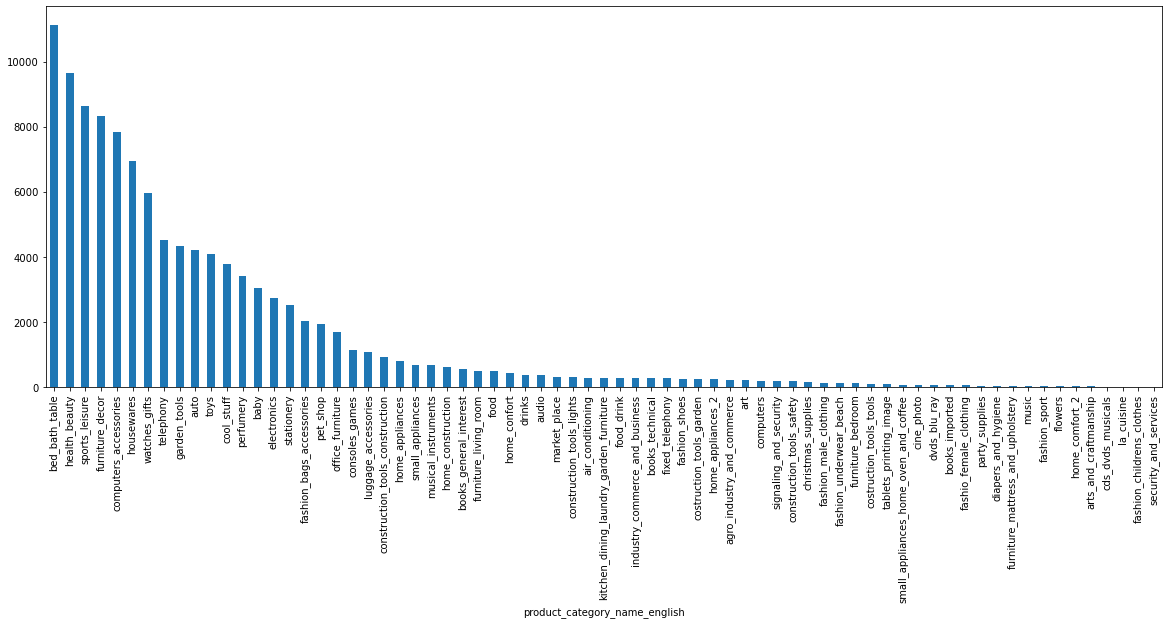

In [107]:
fig = plt.figure(figsize=(20,7))
ax = full_table['n_reviews'].plot(kind='bar')

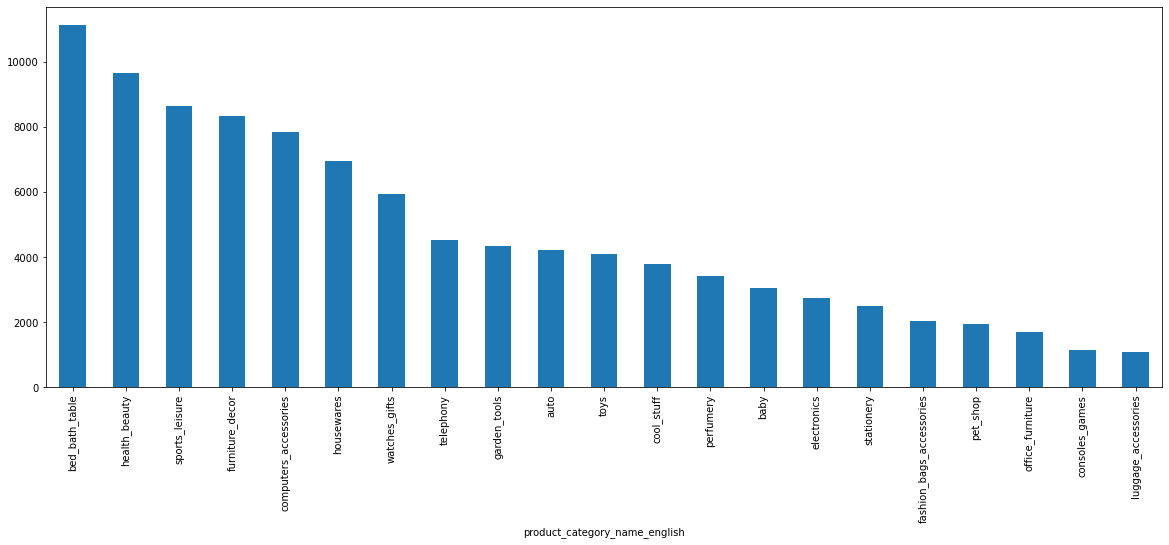

In [126]:
fig = plt.figure(figsize=(20,7))

ax = full_table['n_reviews'][full_table['n_reviews'] > 1000].plot(kind='bar')